In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from os import listdir
from os.path import isfile, join
import json
import pandas as pd
import numpy as np

In [3]:
HISTORY_DIR = "history2"
history_files = [f for f in listdir(HISTORY_DIR) if isfile(join(HISTORY_DIR, f))]

In [4]:
history_jsons = []
for f in history_files:
    history = json.load(open(join(HISTORY_DIR, f), "r")) 
    history["path"] = f
    history_jsons.append(history)

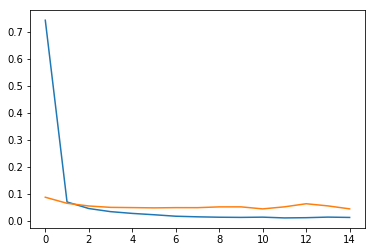

In [5]:
plt.figure()
plt.plot(history_jsons[0]["history"]["loss"])
plt.plot(history_jsons[0]["history"]["val_loss"])

In [6]:
for record in history_jsons:
    record["min_val_loss"] = min(record["history"]["val_loss"])
    record["conv_layers"] = 0
    for key in ["convo_1", "convo_2", "convo_3", "convo_4", "convo_5"]:
        record[key] = record.get(key, True)
        if record[key]:
            record["conv_layers"] += 1

In [7]:
df = pd.DataFrame(history_jsons)
df.drop(['history'], axis = 1, inplace = True)
df.sort_values(["min_val_loss"])


,add_pooling,conv_layers,convo_1,convo_2,convo_3,convo_4,convo_5,convo_depth_factor,dense_1_factor,dense_2_factor,dense_3,dense_3_factor,dropout_1,dropout_2,dropout_3,min_val_loss,path
274,True,3,False,True,True,True,False,3,6,8,True,2,True,False,True,0.037451,bfdfcc20-d562-450a-811d-a68649fd895f
130,True,3,False,False,True,True,True,5,2,6,False,6,True,False,False,0.037546,8f04776e-f89d-4c31-95de-b8ff91184990
8,True,3,False,True,True,True,False,2,9,4,True,7,True,False,False,0.037558,3b65d545-ef88-4f4b-a1c7-05ddf29c8383
144,True,3,False,True,True,True,False,3,6,8,True,2,True,False,True,0.037641,e00201f3-1af3-4099-a70a-28878eeda558
169,True,4,True,False,True,True,True,4,6,1,False,8,True,False,False,0.037742,f12b0df3-bdc3-43e4-8b0a-4f59c9388013
127,True,4,True,True,True,False,True,4,8,7,False,5,False,False,True,0.038078,1c704b3f-2feb-4a46-a37c-9b7b7a246542
242,True,4,True,True,True,False,True,4,9,4,False,9,True,False,False,0.038410,8cb20c69-29dc-4175-ac6a-68b5dde4f185
209,True,4,True,True,False,True,True,4,3,8,False,7,True,False,True,0.038498,f956ade7-b1d3-4975-af65-d36c6f54ae2c
272,True,2,False,False,False,True,True,5,7,2,True,9,True,False,False,0.038538,351a3648-54b8-4d6b-a17b-1038729adf68
17,True,3,True,False,True,True,False,1,4,7,True,2,True,False,False,0.038570,cb718a60-1ebd-429a-a19e-595d0778e927


In [8]:
from scipy.stats import spearmanr

def spearman_table(df, target_column):
    spearman_rows = []
    for col in df.columns:
        spearman = spearmanr(df[target_column], df[col])
        spearman_rows.append({"setting": col, "correlation": spearman.correlation, "pvalue": spearman.pvalue})

    return pd.DataFrame(spearman_rows).sort_values(["pvalue"])

In [9]:
spearman_table(df, "min_val_loss")

/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,correlation,pvalue,setting
15,1.000000,0.000000e+00,min_val_loss
1,-0.476807,4.649722e-19,conv_layers
13,0.450758,5.718384e-17,dropout_2
5,-0.376722,6.347372e-12,convo_4
0,-0.362782,4.164610e-11,add_pooling
4,-0.267436,1.712168e-06,convo_3
14,0.232933,3.346800e-05,dropout_3
2,-0.198578,4.266830e-04,convo_1
12,-0.198233,4.368299e-04,dropout_1
10,0.183279,1.167557e-03,dense_3


In [10]:
df.groupby("dropout_2").aggregate([np.min, np.average, np.max])["min_val_loss"]

,amin,average,amax
dropout_2,,,
False,0.037451,0.064372,0.349938
True,0.049447,0.123553,0.349959


In [11]:
df2 = df[df["dropout_2"] == False]
spearman_table(df2, "min_val_loss")

/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/home/ilya/miniconda3/envs/carnd-term1/lib/pyth

,correlation,pvalue,setting
15,1.000000,0.000000e+00,min_val_loss
1,-0.518377,4.156004e-20,conv_layers
5,-0.359401,1.026044e-09,convo_4
14,0.314205,1.204700e-07,dropout_3
0,-0.291530,9.951773e-07,add_pooling
4,-0.278911,2.986072e-06,convo_3
12,-0.219186,2.698363e-04,dropout_1
10,0.216227,3.278112e-04,dense_3
3,-0.206768,6.001250e-04,convo_2
6,-0.163817,6.776961e-03,convo_5


In [12]:
df2.groupby("add_pooling").aggregate([np.min, np.average, np.max])["min_val_loss"]

,amin,average,amax
add_pooling,,,
False,0.046125,0.075898,0.349938
True,0.037451,0.063256,0.349930


In [13]:
df3 = df2[df2["add_pooling"] == True]
spearman_table(df3, "min_val_loss")

/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/home/ilya/miniconda3/envs/carnd-term1/lib/pyth

,correlation,pvalue,setting
15,1.000000,0.000000e+00,min_val_loss
1,-0.527200,3.838160e-19,conv_layers
5,-0.374067,1.177126e-09,convo_4
14,0.343639,2.786340e-08,dropout_3
4,-0.295791,2.125613e-06,convo_3
12,-0.236655,1.688348e-04,dropout_1
10,0.229380,2.697774e-04,dense_3
2,-0.226990,3.136792e-04,convo_1
11,-0.194232,2.121812e-03,dense_3_factor
9,-0.192551,2.322673e-03,dense_2_factor


In [14]:
df3.groupby("conv_layers").aggregate([np.min, np.average, np.max])["min_val_loss"]

,amin,average,amax
conv_layers,,,
0,0.047656,0.075400,0.111660
1,0.050319,0.088847,0.349930
2,0.038538,0.065566,0.349930
3,0.037451,0.062772,0.349930
4,0.037742,0.048236,0.158413
5,0.039830,0.043109,0.048486


In [15]:
df4 = df3[df3["conv_layers"] >= 3]
spearman_table(df4, "min_val_loss")

/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/home/ilya/miniconda3/envs/carnd-term1/lib/pyth

,correlation,pvalue,setting
15,1.000000,0.000000e+00,min_val_loss
14,0.384834,9.033561e-07,dropout_3
1,-0.368769,2.726808e-06,conv_layers
12,-0.333861,2.471147e-05,dropout_1
9,-0.291561,2.555749e-04,dense_2_factor
5,-0.248562,1.947654e-03,convo_4
10,0.185240,2.188377e-02,dense_3
4,-0.177712,2.797257e-02,convo_3
11,-0.151309,6.190131e-02,dense_3_factor
2,-0.077500,3.410013e-01,convo_1


In [16]:
df4.groupby("dense_2_factor").aggregate([np.min, np.average, np.max])["min_val_loss"]

,amin,average,amax
dense_2_factor,,,
1,0.037742,0.068665,0.158413
2,0.041211,0.080808,0.349577
3,0.040916,0.053005,0.074784
4,0.037558,0.049211,0.076479
5,0.040065,0.048564,0.058653
6,0.037546,0.045792,0.066435
7,0.038078,0.045272,0.053099
8,0.037451,0.088738,0.349930
9,0.038804,0.045589,0.056513


In [17]:
df5 = df4[df4["dense_2_factor"] >= 5]
spearman_table(df5, "min_val_loss")

/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/home/ilya/miniconda3/envs/carnd-term1/lib/pyth

,correlation,pvalue,setting
15,1.000000,0.000000,min_val_loss
12,-0.477733,0.000002,dropout_1
1,-0.377561,0.000244,conv_layers
14,0.239567,0.022954,dropout_3
5,-0.211432,0.045451,convo_4
3,-0.194685,0.065951,convo_2
4,-0.119424,0.262231,convo_3
9,-0.110250,0.300922,dense_2_factor
10,0.096906,0.363551,dense_3
8,0.073578,0.490699,dense_1_factor


In [18]:
df5.groupby("dense_3_factor").aggregate([np.min, np.average, np.max])["min_val_loss"]

,amin,average,amax
dense_3_factor,,,
1,0.038804,0.121782,0.349930
2,0.037451,0.044885,0.052339
3,0.039896,0.046531,0.058653
4,0.041408,0.048562,0.058444
5,0.038078,0.044954,0.051006
6,0.037546,0.043828,0.055346
7,0.038498,0.047050,0.056513
8,0.040503,0.044909,0.053095
9,0.040065,0.048790,0.066435


In [19]:
df6 = df5[df5["dense_3_factor"]<=5]
spearman_table(df6, "min_val_loss")

/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ilya/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/home/ilya/miniconda3/envs/carnd-term1/lib/pyth

,correlation,pvalue,setting
15,1.000000,0.000000,min_val_loss
12,-0.494966,0.000142,dropout_1
1,-0.404897,0.002390,conv_layers
5,-0.245747,0.073263,convo_4
14,0.149812,0.279588,dropout_3
4,-0.148251,0.284687,convo_3
9,-0.143907,0.299193,dense_2_factor
3,-0.141077,0.308894,convo_2
7,0.097658,0.482351,convo_depth_factor
2,-0.096272,0.488616,convo_1


In [20]:
df6.sort_values(["min_val_loss"])

,add_pooling,conv_layers,convo_1,convo_2,convo_3,convo_4,convo_5,convo_depth_factor,dense_1_factor,dense_2_factor,dense_3,dense_3_factor,dropout_1,dropout_2,dropout_3,min_val_loss,path
274,True,3,False,True,True,True,False,3,6,8,True,2,True,False,True,0.037451,bfdfcc20-d562-450a-811d-a68649fd895f
144,True,3,False,True,True,True,False,3,6,8,True,2,True,False,True,0.037641,e00201f3-1af3-4099-a70a-28878eeda558
127,True,4,True,True,True,False,True,4,8,7,False,5,False,False,True,0.038078,1c704b3f-2feb-4a46-a37c-9b7b7a246542
17,True,3,True,False,True,True,False,1,4,7,True,2,True,False,False,0.038570,cb718a60-1ebd-429a-a19e-595d0778e927
194,True,4,True,False,True,True,True,3,2,9,False,1,True,False,False,0.038804,3f946628-fe05-40f8-bf9c-7157398f2c54
201,True,5,True,True,True,True,True,1,2,9,False,2,True,False,True,0.039830,9a05d057-c2ce-49bb-8054-194f441b7427
94,True,4,True,True,True,True,False,2,8,9,False,3,True,False,False,0.039896,35046e81-2501-4013-9211-63adf059aaa3
11,True,4,True,True,True,True,False,3,1,5,False,5,True,False,True,0.041131,e5f84fbe-3cbd-40a1-ba6d-26dab3afb610
118,True,5,True,True,True,True,True,4,9,6,False,3,False,False,True,0.041157,7b68ebbf-d14d-4109-b6e8-3c3030002ad7
46,True,5,True,True,True,True,True,4,3,9,False,4,False,False,False,0.041408,f1b4b4e3-af03-40bb-8e17-d395d9643097
